In [2]:
import re
import gensim
import logging
import pandas as pd
import urllib.request
from gensim.models import word2vec
import matplotlib.pyplot as plt
from matplotlib import style
import networkx as nx
from networkx.algorithms import community

C:\Users\User\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [3]:
urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")

('ruscorpora_mystem_cbow_300_2_2015.bin.gz',
 <http.client.HTTPMessage at 0x1b44fba7668>)

In [4]:
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

In [5]:
flower = ['ромашка_S']
edges = []
neighbours_1 = []
for word in flower:
    if word in model:
        print(word) 
        print(model[word][:10])
        for i in model.most_similar(positive=[word], topn=10):
            print(i[0], i[1])
            edge = (word, i[0])
            edges.append(edge)
            neighbours_1.append(word)
            neighbours_1.append(i[0])
            if i[1] >0.5:
                print(i[1])
                print(model[i[0]][:10])
                for m in model.most_similar(positive=[i[0]], topn=10):
                    print(m[0], m[1])
                    edge_new = (i[0], m[0])
                    edges.append(edge_new)
                    neighbours_1.append(m[0])

    else:
        # Увы!
        print('Увы, слова "%s" нет в модели!' % word)
#(edges)
#print(flower_1)

ромашка_S
[ 0.02083518 -0.03445422 -0.07272028 -0.02261832 -0.0413738   0.0080162
  0.01711751  0.03918014  0.00290521 -0.01706054]
цветок_S 0.6362708806991577
0.6362708806991577
[-0.02581728 -0.03161608 -0.08591826 -0.06149414 -0.01005295 -0.02876001
  0.03841765  0.08344615 -0.02903873  0.01043771]
роза_S 0.7362078428268433
хризантема_S 0.6714944839477539
букет_S 0.6640661358833313
маргаритка_S 0.6519109010696411
цветочек_S 0.6496486663818359
фиалка_S 0.6383365988731384
ромашка_S 0.6362708806991577
букетик_S 0.6277430653572083
георгин_S 0.6215323209762573
лепесток_S 0.6212639808654785
роза_S 0.6028355360031128
0.6028355360031128
[-0.01105841  0.01377222 -0.07011075 -0.07622215 -0.01402765 -0.00607022
 -0.02344128  0.10571317  0.02021863 -0.07131413]
цветок_S 0.736207902431488
хризантема_S 0.7018312215805054
пион_S 0.6467634439468384
лилия_S 0.629615068435669
ромашка_S 0.6028355360031128
тюльпан_S 0.5929808616638184
георгин_S 0.5860720276832581
флокс_S 0.5740082859992981
маргаритка_S 

In [35]:
G = nx.Graph()
G.add_nodes_from(neighbours_1)
G.add_edges_from(edges)




In [42]:
#degree centrality
deg_flower = nx.degree_centrality(G)
i = 0
print('\n','Degree centrality')
for nodeid in sorted(deg_flower, key=deg_flower.get, reverse=True):
    i += 1
    print(nodeid, round(deg_flower[nodeid], 3))

    if i == 10:
        break

#betweenness centrality
bet_flower = nx.betweenness_centrality(G) 
i = 0
print('\n','Betweenness centrality')
for nodeid in sorted(bet_flower, key=bet_flower.get, reverse=True):
    i += 1
    print(nodeid, round(bet_flower[nodeid], 3))
    if i == 10:
        break

#closeness centrality
clos_flower = nx.eigenvector_centrality(G)
i = 0
print('\n','Closeness centrality')
for nodeid in sorted(clos_flower, key=clos_flower.get, reverse=True):
    i += 1
    print(nodeid, round(clos_flower[nodeid], 3))
    if i == 10:
        break

#eigencentrality
eig_flower = nx.eigenvector_centrality(G)
i = 0
print('Eigencentrality')
for nodeid in sorted(eig_flower, key=eig_flower.get, reverse=True):
    i += 1
    print(nodeid, round(eig_flower[nodeid], 3))
    if i == 10:
        break

# Радиус графа, минимальный эксцентриситет среди всех вершин графа
print('\n', 'Радиус графа:', nx.radius(G))

# Диаметр графа, самый длинный путь от одной вершины до другой
print('\n','Диаметр графа:', nx.diameter(G))

# Коэффициент ассортативности:
print('\n','Коэффициент ассортативности:', nx.degree_pearson_correlation_coefficient(G))

# Коэффициент кластеризации:
print('\n','Коэффициент кластеризации:', nx.average_clustering(G))
print('\n','Коэффициент транзитивности:', nx.transitivity(G))

# Плотность графа, отношение рёбер и узлов
print('\n','Плотность графа:', nx.density(G))



 Degree centrality
флокс_S 0.245
цветок_S 0.226
донник_S 0.226
маргаритка_S 0.208
душица_S 0.208
тысячелистник_S 0.208
ромашка_S 0.189
роза_S 0.189
фиалка_S 0.189
одуванчик_S 0.189

 Betweenness centrality
ромашка_S 0.348
флокс_S 0.257
ландыш_S 0.186
тысячелистник_S 0.178
одуванчик_S 0.175
душица_S 0.174
цветок_S 0.163
донник_S 0.147
маргаритка_S 0.121
фиалка_S 0.113

 Closeness centrality
ромашка_S 0.368
цветок_S 0.329
маргаритка_S 0.318
роза_S 0.276
флокс_S 0.268
тысячелистник_S 0.259
одуванчик_S 0.257
донник_S 0.241
фиалка_S 0.22
георгин_S 0.205
Eigencentrality
ромашка_S 0.368
цветок_S 0.329
маргаритка_S 0.318
роза_S 0.276
флокс_S 0.268
тысячелистник_S 0.259
одуванчик_S 0.257
донник_S 0.241
фиалка_S 0.22
георгин_S 0.205

 Радиус графа: 2

 Диаметр графа: 4

 Коэффициент ассортативности: -0.5710078248897719

 Коэффициент кластеризации: 0.31405795850240287

 Коэффициент транзитивности: 0.24489795918367346

 Плотность графа: 0.06568832983927324


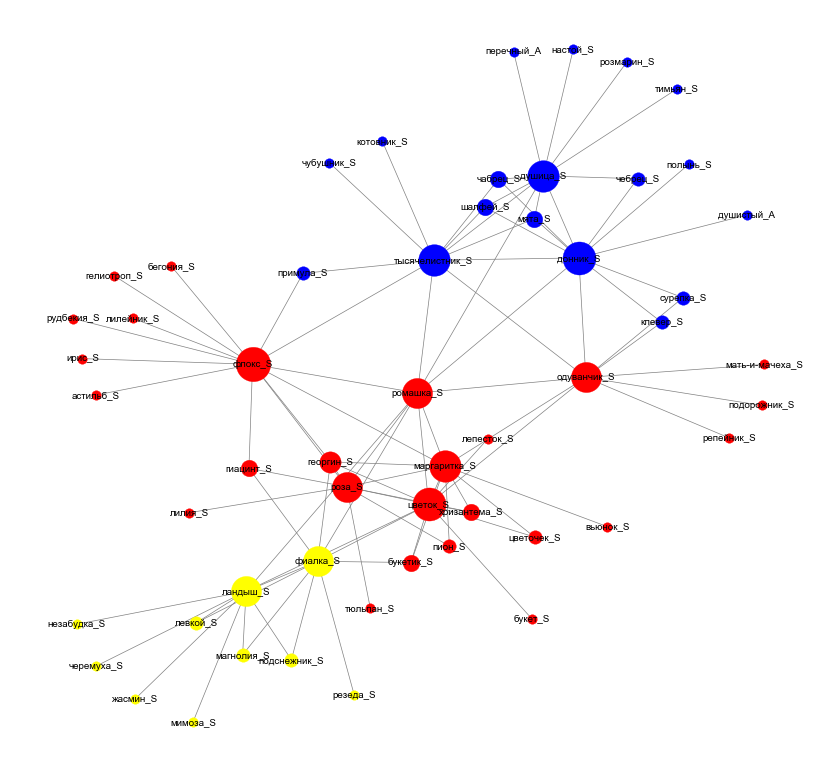

In [43]:
def nodecolor(G):
    import networkx as nx
    from networkx.algorithms import community
    communities_generator = community.girvan_newman(G)
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    #sorted(map(sorted, next_level_communities))
    next_level_communities = list(next_level_communities)
    a1, a2, a3 = next_level_communities
    a1 = list(a1) 
    a2 = list(a2) 
    a3 = list(a3)
    #print( a1, a2 ,a3)
    return a1, a2, a3

def color(i, G):
    
    next_level_communities = nodecolor(G)
    next_level_communities = list(next_level_communities)
    a1, a2, a3 = next_level_communities
    a1 = list(a1) 
    a2 = list(a2) 
    a3 = list(a3)
    if i in a1:
        return 'red'
    elif i in a2:
        return 'yellow'
    elif i in a3:
        return 'blue'
nodecolor(G)

def size(i, G):
    size = nx.degree_centrality(G)
   
    print('\n','Degree centrality')
    for nodeid in sorted(size, key=size.get, reverse=True):
        print(nodeid, round(size[nodeid], 3))
      
    

style.use('ggplot')
pos=nx.spring_layout(G)
plt.figure(figsize=(20,20), dpi=50)
nx.draw_networkx_edges(G, pos, edge_color='grey')
nx.draw_networkx_labels(G, pos, font_size=14, font_family='Arial')
plt.axis('off')
for i in G.nodes:
    li = []
    li.append(i)
    size = deg_flower[i]*10000
    nx.draw_networkx_nodes(G, pos, nodelist= li,node_color=color(i, G), node_size=size)
    
 

Цвет — разбиение на сообщества
Размер - отображает центральность